<a href="https://colab.research.google.com/github/ZivBenda/tabular_data_science_biu_final_project/blob/main/Tabular_Data_Science_Final_Project_Tomer_and_Ziv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explain Any Models with the SHAP Values

* Please read [Explain Any Models with the SHAP Values](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

## Imports

In [2]:
!pip install shap

import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.8 MB/s eta 0:00:00


## Uploading Datasets

In [3]:
url = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [4]:
iris_url = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/IRIS.csv"
titanic_url = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/titanic.csv"
houses_url = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/houses.csv"
cancer_url = "https://raw.githubusercontent.com/ZivBenda/tabular_data_science_biu_final_project/main/datasets/cancer.csv"

dtfs = {"iris_dataset": pd.read_csv(iris_url),
        "titanic_dataset": pd.read_csv(titanic_url),
        "houses_dataset": pd.read_csv(houses_url),
        "cancer_dataset": pd.read_csv(cancer_url),
        }

In [5]:
print(df.shape)

for dataset in dtfs.values():
  print(dataset.shape)

(1599, 12)
(150, 5)
(891, 12)
(1460, 81)
(569, 33)


In [6]:
df.columns
df['quality'] = df['quality'].astype(int)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


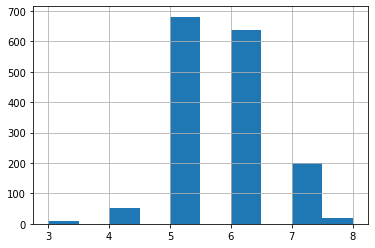

In [8]:
df['quality'].hist()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [11]:
X_test.shape

(160, 11)

In [12]:
X_test.mean()

fixed acidity            8.239375
volatile acidity         0.513281
citric acid              0.269813
residual sugar           2.557500
chlorides                0.086425
free sulfur dioxide     14.981250
total sulfur dioxide    42.506250
density                  0.996653
pH                       3.318500
sulphates                0.652062
alcohol                 10.481250
dtype: float64

In [13]:
X_test.iloc[10,:]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

### KNN

In [14]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train.values, Y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [16]:
knn_explainer = shap.KernelExplainer(knn.predict, X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

  0%|          | 0/160 [00:00<?, ?it/s]

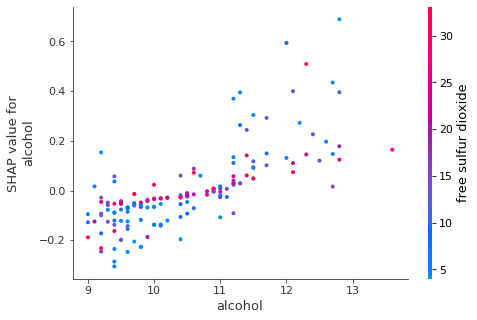

In [17]:
shap.dependence_plot("alcohol", knn_shap_values, X_test)

In [18]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

In [ ]:
shap.initjs()
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

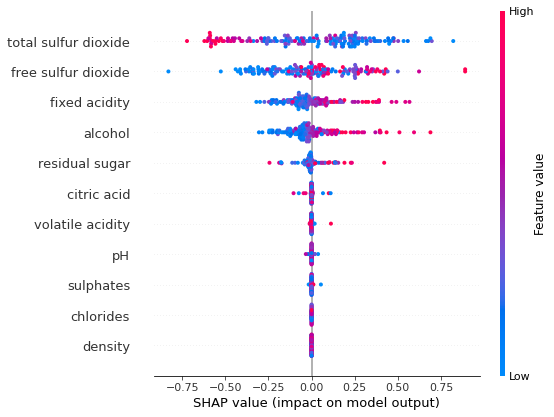

In [20]:
shap.summary_plot(knn_shap_values, X_test)

### SVM

In [21]:
from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train.values, Y_train)  

SVC(decision_function_shape='ovo')

In [22]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

  0%|          | 0/160 [00:00<?, ?it/s]

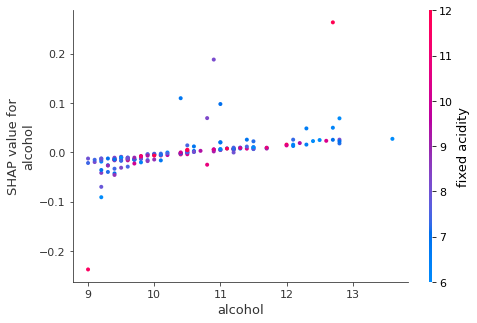

In [23]:
shap.dependence_plot("alcohol", svm_shap_values, X_test)

In [1]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

NameError: ignored

In [25]:
shap.initjs()
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

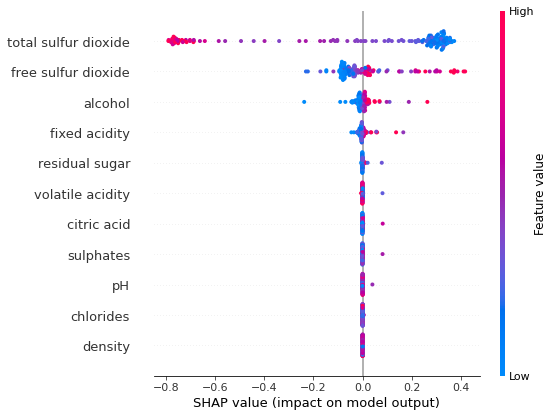

In [26]:
shap.summary_plot(svm_shap_values, X_test)

### Linear Regression

https://snyk.io/advisor/python/shap/functions/shap.KernelExplainer

In [27]:
    np.set_printoptions(threshold=100000)
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.utils.sparsefuncs import csc_median_axis_0
    import shap
    np.random.seed(0)

    X, y = shap.datasets.a1a() # pylint: disable=unbalanced-tuple-unpacking
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    # Calculate median of background data
    median_dense = csc_median_axis_0(x_train.tocsc())
    median = sp.sparse.csr_matrix(median_dense)
    explainer = shap.KernelExplainer(linear_model.predict, median)

NameError: ignored

### Logistic Regression
https://snyk.io/advisor/python/shap/functions/shap.KernelExplainer

In [ ]:
    import sklearn
    import shap
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression

    # train a logistic regression classifier
    X_train, X_test, Y_train, _ = train_test_split(*shap.datasets.iris(), test_size=0.1, random_state=0)
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, Y_train)

    # use Kernel SHAP to explain test set predictions with dense data
    explainer = shap.KernelExplainer(lr.predict_proba, X_train, nsamples=100, link="logit", l1_reg="rank(3)")


## XGBOOST

https://mljar.com/blog/feature-importance-xgboost/

In [ ]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();

In [ ]:

#Load the datasets and split it into training and testing subsets. 
#The 75% of data will be used for training and the rest for testing (will be needed in permutation-based method).

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
#Fitting the Xgboost Regressor is simple and take 2 lines (amazing package, I love it!):

xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)
#I’ve used default hyperparameters in the Xgboost and just set the number of trees in the model (n_estimators=100).

#To get the feature importances from the Xgboost model we can just use the feature_importances_ attribute:

xgb.feature_importances_

In [ ]:

# It’s is important to notice, that it is the same API interface like for ‘scikit-learn’ models, for example in Random Forest we would do the same to get importances.

# Let’s visualize the importances (chart will be easier to interpret than values).


In [ ]:
plt.barh(boston.feature_names, xgb.feature_importances_)
# Xgboost Built-in Feature Importance Unsorted

# To have even better plot, let’s sort the features based on importance value:

sorted_idx = xgb.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
# Xgboost Built-in Feature Importance Sorted

# About Xgboost Built-in Feature Importance
# There are several types of importance in the Xgboost - it can be computed in several different ways. The default type is gain if you construct model with scikit-learn like API (docs). When you access Booster object and get the importance with get_score method, then default is weight. You can check the type of the importance with xgb.importance_type.
# The gain type shows the average gain across all splits where feature was used.
# The weight shows the number of times the feature is used to split data. This type of feature importance can favourize numerical and high cardinality features. Be careful!
# There are also cover, total_gain, total_cover types of importance.
# Permutation Based Feature Importance (with scikit-learn)
# Yes, you can use permutation_importance from scikit-learn on Xgboost! (scikit-learn is amazing!) It is possible because Xgboost implements the scikit-learn interface API. It is available in scikit-learn from version 0.22.

# This permutation method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

# The permutation importance for Xgboost model can be easily computed:

perm_importance = permutation_importance(xgb, X_test, y_test)
# The visualization of the importance:

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
# Xgboost Permutation Feature Importance

# The permutation based importance is computationally expensive (for each feature there are several repeast of shuffling). The permutation based method can have problem with highly-correlated features. Let’s check the correlation in our dataset:

correlation_heatmap(X_train[boston.feature_names[sorted_idx]])
# Correlation Heatmap

# Based on above results, I would say that it is safe to remove: ZN, CHAS, AGE, INDUS. Their importance based on permutation is very low and they are not highly correlated with other features (abs(corr) < 0.8).

# In AutoML package mljar-supervised, I do one trick for feature selection: I insert random feature to the training data and check which features have smaller importance than a random feature. I remove those from further training. The trick is very similar to one used in the Boruta algorihtm.

# Feature Importance Computed with SHAP Values
# The third method to compute feature importance in Xgboost is to use SHAP package. It is model-agnostic and using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
# To visualize the feature importance we need to use summary_plot method:

shap.summary_plot(shap_values, X_test, plot_type="bar")
# Xgboost SHAP Feature Importance

# The nice thing about SHAP package is that it can be used to plot more interpretation plots:

shap.summary_plot(shap_values, X_test)
# Xgboost SHAP Summary

shap.dependence_plot("LSTAT", shap_values, X_test)
# Xgboost SHAP Dependence

# The computing feature importances with SHAP can be computationally expensive.

# Summary
# The are 3 ways to compute the feature importance for the Xgboost:

# built-in feature importance
# permutation based importance
# importance computed with SHAP values
# In my opinion, it is always good to check all methods and compare the results. It is important to check if there are highly correlated